In [80]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [81]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

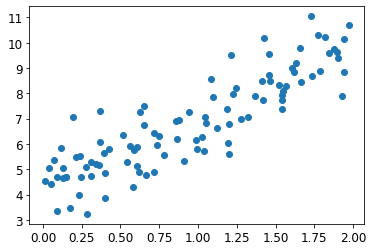

In [82]:
plt.scatter(X,y)

In [83]:
# calculate parameters using normal equation
X_b = np.c_[np.ones((100,1)), X] # add x0 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [84]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [85]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

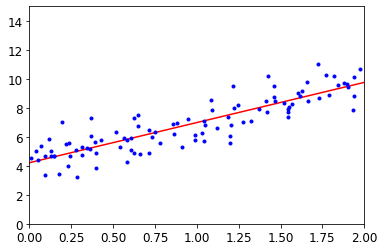

In [86]:
plt.plot(X_new, y_predict, "-r")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()


Linear Regression using Batch Gradient Decent

In [87]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)


In [88]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - gradients * eta
theta

array([[4.21509616],
       [2.77011339]])

Linear Regression using Stochastic Gradient Decent  

In [89]:
n_epochs = 50
t0, t1 = 5, 10 # learning schedule hyperparamaters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range (n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index +1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch* m + i)
        theta = theta -eta * gradients
theta

array([[4.18549122],
       [2.72943325]])

Linear Regression using the scikit-learn implementation of Stochastic Gradient Decent

In [90]:
from sklearn.linear_model import SGDRegressor

sdg_reg = SGDRegressor(max_iter = 1000, penalty = None, eta0=0.1)
sdg_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [91]:
sdg_reg.intercept_,sdg_reg.coef_

(array([4.22609703]), array([2.79227913]))

Polynomial Regression

In [102]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


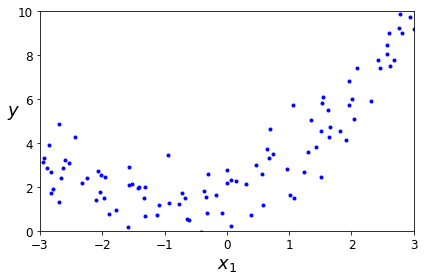

In [103]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [120]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_high_degree = PolynomialFeatures(degree=50, include_bias=False)
X_poly_high = poly_features_high_degree.fit_transform(X)
print(f"Original value: {X[0]} and transformed values: {X_poly_high[0]}")

poly_features_quadratic = PolynomialFeatures(degree = 2,include_bias= False)
X_poly_quadratic = poly_features_quadratic.fit_transform(X)


Original value: [-2.07304678] and transformed values: [-2.07304678e+00  4.29752294e+00 -8.90896607e+00  1.84687034e+01
 -3.82864860e+01  7.93696764e+01 -1.64537052e+02  3.41093005e+02
 -7.07101753e+02  1.46585501e+03 -3.03878600e+03  6.29954553e+03
 -1.30592525e+04  2.70724414e+04 -5.61224373e+04  1.16344438e+05
 -2.41187462e+05  4.99992890e+05 -1.03650865e+06  2.14873091e+06
 -4.45441969e+06  9.23422037e+06 -1.91429708e+07  3.96842738e+07
 -8.22673559e+07  1.70544077e+08 -3.53545849e+08  7.32917082e+08
 -1.51937139e+09  3.14972797e+09 -6.52953341e+09  1.35360282e+10
 -2.80608196e+10  5.81713916e+10 -1.20592016e+11  2.49992890e+11
 -5.18246954e+11  1.07435018e+12 -2.22717817e+12  4.61704453e+12
 -9.57134927e+12  1.98418547e+13 -4.11330930e+13  8.52708258e+13
 -1.76770411e+14  3.66453330e+14 -7.59674894e+14  1.57484159e+15
 -3.26472028e+15  6.76791785e+15]


In [121]:
from sklearn.linear_model import LinearRegression

lin_reg_high = LinearRegression()
lin_reg_high.fit(X_poly_high, y)
lin_reg_high.intercept_, lin_reg_high.coef_

linear_reg_quad = LinearRegression()
linear_reg_quad.fit(X_poly_quadratic,y)


LinearRegression()

In [117]:
linear_reg = LinearRegression()
linear_reg.fit(X,y)

LinearRegression()

Saving figure quadratic_predictions_plot


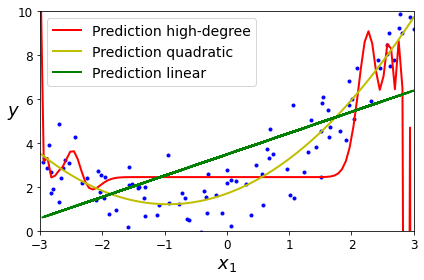

In [124]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_poly_high = poly_features_high_degree.transform(X_new)
y_high = lin_reg_high.predict(X_poly_high)
y_linear = linear_reg.predict(X)
X_poly_quad = poly_features_quadratic.transform(X_new)
y_quad = linear_reg_quad.predict(X_poly_quad )


plt.plot(X, y, "b.")
plt.plot(X_new, y_high, "r-", linewidth=2, label="Prediction high-degree")
plt.plot(X_new, y_quad, "y-",linewidth =2, label = "Prediction quadratic" )
plt.plot(X, y_linear, "g-", linewidth =2, label = "Prediction linear")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Checking if the model is overfitting/underfitting using learning curves

In [127]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown



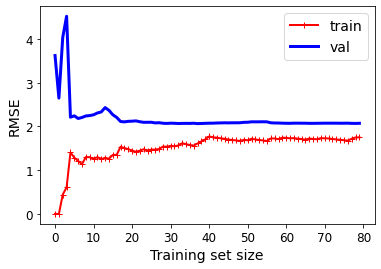

In [128]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

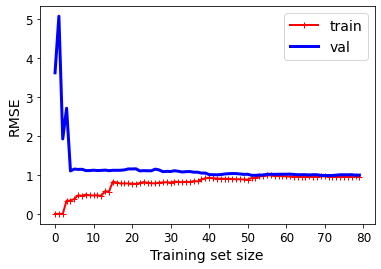

In [134]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree =2, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

Ridge Regression (Regression with Regularisation (L2 norm half the square of weight vectors))

In [136]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.93286388]])

In [137]:
sdg_reg = SGDRegressor()
sdg_reg.fit(X,y)
sdg_reg.predict([[1.5]])


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.90790394])